## Bag of Words (BoW)
- 단어의 순서는 고려하지 않고 단어들의 출현 빈도(frequency)에만 집중하는 텍스트 데이터의 수치화 방법
- 우선, 각 단어에 교유한 정수 인덱스를 부여
- 각 인덱스의 위치에 단어 토큰의 등장 횟수를 기록한 벡터를 만듬
- scikit-learn의 CountVectorizer를 이용하여 간단히 BoW를 구성할 수 있음

In [1]:
# 단어들에게 인덱스의 수치를 담고, 가방에 담는 것
# BoW는 순서의 개념이 없음
# 각각 몇번 나왔다의 count 개념만 있음.  -> 뭐가 먼저 나왔는지 전후관계가 없음
# 단지 출현 빈도만 보는 것

In [2]:
# 쓰는 방법
from sklearn.feature_extraction.text import CountVectorizer  # 특징 추출

In [3]:
text_data = ['나는 배가 고프다', '내일 점심 뭐먹지', '내일 공부 해야겠다', '점심 먹고 공부 해야지']
# 이런식으로 4개 있다고 가정,

# count_vectorizer로 객채 만듬
count_vectorizer = CountVectorizer()

In [4]:
# 얘도 일종의 비지도 학습

# fit 호출해서 학습 시킴
count_vectorizer.fit(text_data)
print(count_vectorizer.vocabulary_)   # vocabulary_ 언더바 속성을 찍어봄

{'나는': 2, '배가': 6, '고프다': 0, '내일': 3, '점심': 7, '뭐먹지': 5, '공부': 1, '해야겠다': 8, '먹고': 4, '해야지': 9}


In [5]:
sentence = [text_data[0]]
print(count_vectorizer.transform(sentence).toarray())   # 얘를 .toarray()로 해서 찍어봄

[[1 0 1 0 0 0 1 0 0 0]]


In [6]:
# 고프다 1번, 나는 1번, 배가 1번 나오고 나머지는 안나왔다는 말임
# 고프다:0 , 나는:2 , 배가:6
# 공부:1  ->  0
# 먹고:4  ->  0
# 뭐먹지:5 -> 0
# 1010001000 -> 의 순서중 각 위치에서 1은 나온거고, 0은 안나온것.

In [7]:
sentence = ['오늘 점심 맛없었어', '내일 점심 또 그럴까']
print(count_vectorizer.transform(sentence).toarray())   # 얘를 .toarray()로 해서 찍어봄

[[0 0 0 0 0 0 0 1 0 0]
 [0 0 0 1 0 0 0 1 0 0]]


In [8]:
# 7번째 -> 점심
# 3번째 -> 내일

In [ ]:
# https://wikidocs.net/book/2155

### 문서 단어 행렬(Document-Term Matrix, DTM)
- 서로 다른 문서들의 BoW들을 결합한 표현 방법  
- 다수의 문서에 등장하는 각 단어들의 빈도를 행렬로 표현한 것  
- 문서1 : 호기심 많은 고양이  
- 문서2 : 꼬리가 긴 고양이  
- 문서3 : 호기심 많은 강아지  
- 문서4 : 철수는 동물을 좋아해요 
|      |강아지|고양이|긴|꼬리가|동물을|많은|좋아해요|철수는|호기심|
|------|-----|-----|--|-----|-----|---|-------|-----|-----|
|문서1  |  0  |  1  | 0|  0  |  0 | 1  |   0   |  0  |  1  |
|문서2  |  0  |  1  |1|  1  |  0 | 0  |   0   |  0  |  0  |
|문서3  |  1  |  0  |0|  0  |  0 | 1  |   0   |  0  |  1  |
|문서4  |  0  |  0  |0|  0  |  1 | 0  |   1   |  1  |  0  |  
- 각 문서에서 등장한 단어의 빈도를 행렬값으로 표시  
- 문서들을 서로 비교할 수 있도록 수치화

### 문서 단어 행렬의 한계
1. 희소 표현
- one-hot encoding 방식의 벡터는 단어 집합의 크기가 벡터의 차원이 됨(대부분의 값이 0)
- 공간과 계산 리소스의 낭비
2. 단순 빈도수 기반 접근
- 여러 문서에 등장하는 모든 단어에 대해서 빈도수만을 사용하는 한계
- 각 문서에는 중요한 단어와 불필요한 단어가 혼재되어 있음
- DTM에 불용어와 중요한 단어에 대한 기중치를 부여하는 방법이 필요

In [10]:
#그래서 나온게 TF-IDF
# TF-IDF는 얘를 봅시다
# https://wikidocs.net/31698

## TF-IDF(Term Frequency-Inverse Document Frequency)

In [11]:
# TF-IDF는 주로 
# 문서의 유사도를 구하는 작업, 검색 시스템에서 검색 결과의 중요도를 정하는 작업, 
# 문서 내에서 특정 단어의 중요도를 구하는 작업 등에 쓰일 수 있습니다.

# TF-IDF는 TF와 IDF를 곱한 값을 의미하는데 이를 식으로 표현해보겠습니다. 
# 문서를 d, 단어를 t, 문서의 총 개수를 n이라고 표현할 때 TF, DF, IDF는 각각 다음과 같이 정의할 수 있습니다.



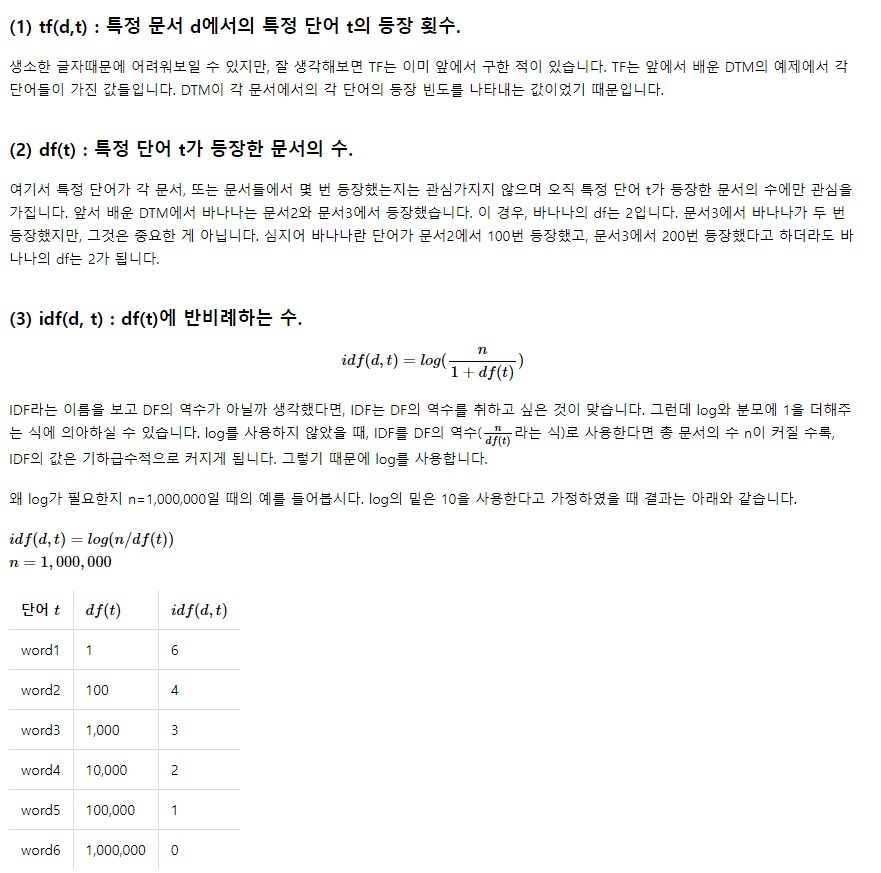

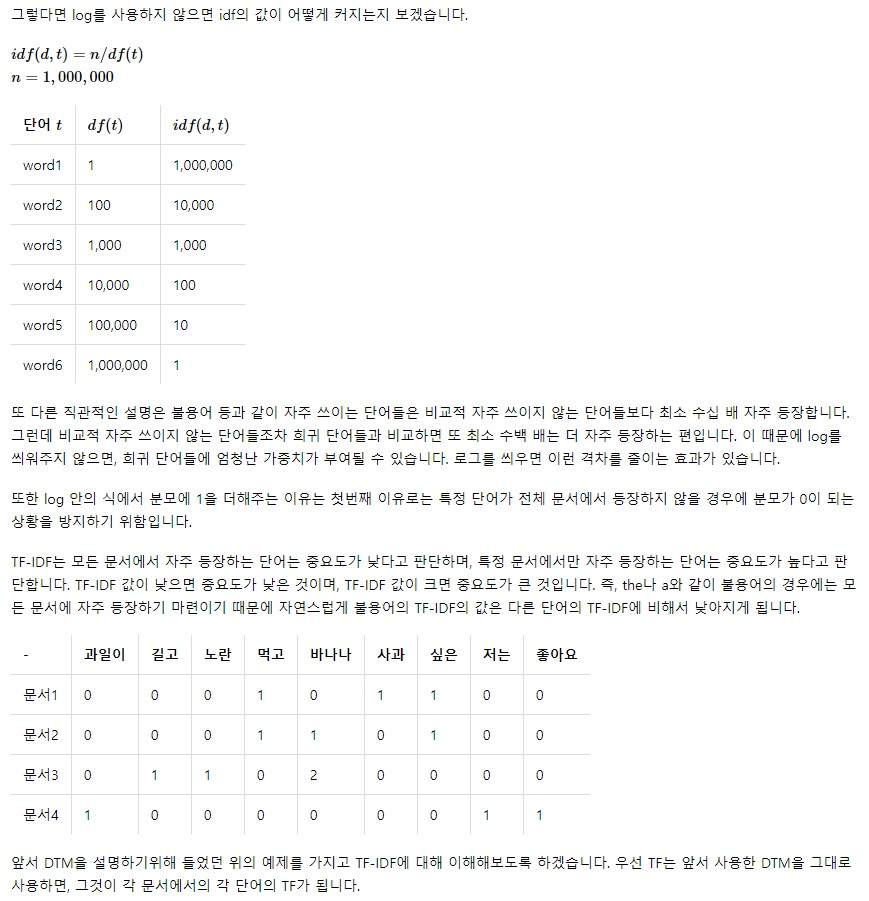

In [12]:
# TF-IDF 값이 낮으면 중요도가 낮은 것이며, TF-IDF 값이 크면 중요도가 큰 것입니다

# 즉, the나 a와 같이 불용어의 경우에는 모든 문서에 자주 등장하기 마련이기 때문에 
# 자연스럽게 불용어의 TF-IDF의 값은 다른 단어의 TF-IDF에 비해서 낮아지게 됩니다.

In [13]:
# 아래는 정리

- 단어의 빈도와 역 문서 빈도를 사용하여 DTM내의 각 단어들마다 중요한 정도의 가중치를 부여하는 방법  
- 주로 문서의 유사도를 구하는 작업, 검색 시스템에서 검색결과의 중요도를 정하는 작업, 문서 내에서 특정 단어의 중요도를 구하는 작업 등에 쓰임  
- TF-IDF 는 TF와 IDF를 곱한 값을 의미  
- 문서를 d, 단어를 t, 문서의 총 개수를 n이라고 하면  
1) tf(d, t): 특정 문서 d에서의 특정 단어 t의 등장 회수  
2) df(t) : 특정 단어 t가 등장한 문서의 수  
3) idf(d, t) : df(t)에 반비례하는 수  
idf(d, t) = log(n / (1 + df(t)))
- 총 문서의 수 n이 급격히 증가하게 되면 IDF의 값이 기하급수적으로 커지는 것을 방지하기 위해 log를 사용  
- 특정 단어가 전체 문서에서 등장하지 않게 되는 경우 분모가 0이 되는 것을 방지하기 위해 1을 더함  
- TF-IDF는 모든 문서에서 자주 등장하는 단어는 중요도가 낮다고 판단  
- 특정 문서에서만 자주 등장하는 단어는 중요도가 높다고 판단  
- TF-IDF 값이 낮으면 중요도가 낮다고 판단  
- 예를 들어 영어에서 the 나 a와 같은 불용어의 경우 모든 문서에 자주 등장하기 때문에 이런 불용어들의 TF-IDF 값은 다른 단어에 비해서 낮아지게 됨  

In [14]:
# 얘를 scikit-learn으로 구해봅시다

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
text_data = ['나는 배가 고프다', '내일 점심 뭐먹지', '내일 공부 해야겠다', '점심 먹고 공부 해야지']
tfidf_vectorizer = TfidfVectorizer()

In [19]:
tfidf_vectorizer.fit(text_data)
print(tfidf_vectorizer.vocabulary_)
# 이렇게 index 구현
# 전체 데이터를 가지고 학습을 시킨 상태

{'나는': 2, '배가': 6, '고프다': 0, '내일': 3, '점심': 7, '뭐먹지': 5, '공부': 1, '해야겠다': 8, '먹고': 4, '해야지': 9}


In [20]:
sentence = [text_data[3]]
print(tfidf_vectorizer.transform(sentence).toarray())

[[0.         0.43779123 0.         0.         0.55528266 0.
  0.         0.43779123 0.         0.55528266]]


In [21]:
# index 1번은 공부
# 0.55528266 은 4번, 먹고.  -> tfidf값이 제일 큼  -> 공부를 먹고 하겠다는 뜻.  -> tfidf로 중요도 판단한것
# 7번은 점심,  9번은 해야지

In [22]:
# 전체를 다 돌려보자
print(tfidf_vectorizer.transform(text_data).toarray())

[[0.57735027 0.         0.57735027 0.         0.         0.
  0.57735027 0.         0.         0.        ]
 [0.         0.         0.         0.52640543 0.         0.66767854
  0.         0.52640543 0.         0.        ]
 [0.         0.52640543 0.         0.52640543 0.         0.
  0.         0.         0.66767854 0.        ]
 [0.         0.43779123 0.         0.         0.55528266 0.
  0.         0.43779123 0.         0.55528266]]


- TF-TDF 값을 사용할 경우, 단순 횟수를 이용하는 것보다 각 단어의 특성을 좀 더 잘 반영할 수 있음
- 모델에 적용할 때도 TfidfVectorizer 를 사용하는 것이 일반적으로 더 좋은 결과를 만들어 냄